In [1]:
!pip install scipy


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [28]:
data = pd.read_csv("ex_data/rest_zyy_02_EPOCFLEX_179733_2023.03.18T09.43.21+08.00.md.bp.csv", header=1)
ch_info = data.iloc[:, [0] + list(range(4, 36))]
data_c = ch_info.iloc[:,1:]

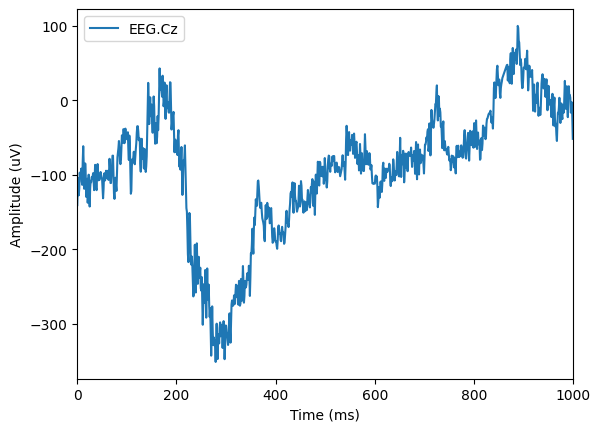

In [29]:
ch_1 = pd.DataFrame(data_c.iloc[:1000,0])
ch_1.plot()
plt.xlim(0,1000)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.show()

In [30]:
data_c

,EEG.Cz,EEG.Fz,EEG.Fp1,EEG.F7,EEG.F3,EEG.FC1,EEG.C3,EEG.FC5,EEG.FT9,EEG.T7,...,EEG.CP2,EEG.CP6,EEG.T8,EEG.FT10,EEG.FC6,EEG.C4,EEG.FC2,EEG.F4,EEG.F8,EEG.Fp2
0,-140.802170,-46.289501,-302.434509,-165.107758,-196.201797,-57.773968,-119.539589,-199.467972,-146.001648,-87.227951,...,-208.006531,32.372978,-155.475372,-118.754089,-75.784790,-97.008659,-69.114555,-205.234024,-182.726563,-256.782990
1,-112.996758,-34.460133,-281.127472,-142.401108,-175.513290,-49.006962,-98.415436,-178.263901,-118.703339,-78.943802,...,-186.793900,40.537525,-151.733749,-97.118408,-48.556698,-75.394730,-54.188515,-189.147247,-163.076141,-240.132370
2,-104.686836,-30.327211,-273.674042,-134.574097,-166.628555,-47.421032,-88.070862,-162.716400,-107.826172,-62.471012,...,-183.020966,45.620068,-144.922012,-90.873604,-39.286606,-65.073181,-49.011250,-174.613495,-152.666916,-226.059921
3,-127.635994,-39.006115,-296.454193,-153.907211,-191.052689,-56.595150,-107.450485,-178.947525,-127.186035,-62.920849,...,-194.621017,42.500599,-148.875549,-106.664268,-60.251934,-81.914261,-58.183777,-192.881958,-172.494247,-245.813873
4,-118.286819,-32.307110,-288.473145,-147.093307,-185.226257,-55.513939,-105.293808,-175.182434,-121.423470,-61.833313,...,-182.643311,50.655022,-146.677444,-102.971443,-63.777836,-76.709267,-50.953285,-188.590607,-165.661743,-242.494202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16438,-78.822311,-21.591038,7.317807,38.116943,-0.099867,73.405914,-3.276929,-17.069897,17.367598,-61.105442,...,-13.648004,19.473545,-17.018692,3.403004,25.827711,4.400288,-53.351532,0.027167,5.421986,2.517585
16439,-97.698875,-18.495600,7.822797,37.566517,4.511002,73.332504,-7.372114,-22.688211,13.251768,-79.487411,...,-16.195894,17.917149,-14.952442,9.547293,18.117268,2.346657,-48.175106,1.051755,6.441179,3.027375
16440,-76.084251,-13.354027,19.598051,48.799721,19.363415,72.746864,7.492181,-10.370138,20.410824,-65.063309,...,-2.859699,15.337692,7.604049,29.005438,15.537611,15.152002,-44.540775,12.321473,16.680893,19.418194
16441,-58.589706,-14.877596,26.750761,50.800152,17.294821,72.674118,14.144690,-3.699768,29.099644,-46.042862,...,-0.807608,12.760816,18.867214,28.976433,21.669765,14.624542,-43.983929,17.944536,20.762672,25.546469


In [33]:
ch = data_c.iloc[:,0]
ch

0       -140.802170
1       -112.996758
2       -104.686836
3       -127.635994
4       -118.286819
            ...    
16438    -78.822311
16439    -97.698875
16440    -76.084251
16441    -58.589706
16442    -77.998810
Name: EEG.Cz, Length: 16443, dtype: float64

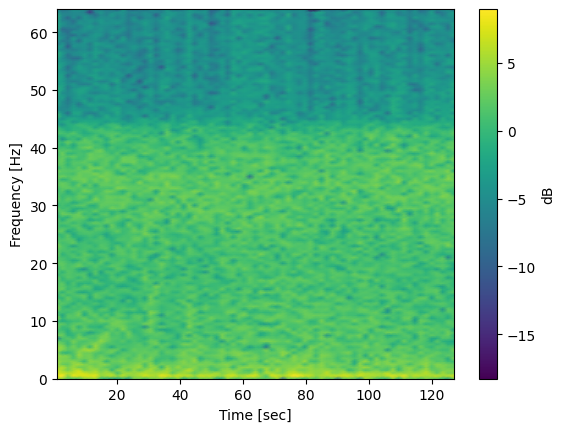

In [40]:
freq = 128
t = np.arange(0, 16443/freq , 1/freq)
signal = ch.to_numpy()

freq,t,Sxx = scipy.signal.spectrogram(signal, freq)

amplitude = np.abs(Sxx)
plt.pcolormesh(t, freq, np.log(amplitude), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='dB')
plt.show()